Submission notebook for the JanataHack: Machine Learning for Banking

* Public rank :
* Private leaderboard rank : 

Have you ever wondered how lenders use various factors such as credit score, annual income, the loan amount approved, tenure, debt-to-income ratio etc. and select your interest rates? 

The process, defined as Ã¢ÂÂrisk-based pricingÃ¢ÂÂ, uses a sophisticated algorithm that leverages different determining factors of a loan applicant. Selection of significant factors will help develop a prediction algorithm which can estimate loan interest rates based on clientsÃ¢ÂÂ information. On one hand, knowing the factors will help consumers and borrowers to increase their credit worthiness and place themselves in a better position to negotiate for getting a lower interest rate. On the other hand, this will help lending companies to get an immediate fixed interest rate estimation based on clients information. Here, your goal is to use a training dataset to predict the loan rate category (1 / 2 / 3) that will be assigned to each loan in our test set.

You can use any combination of the features in the dataset to make your loan rate category predictions. Some features will be easier to use than others.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier 
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [2]:
import os
os.chdir("C:/Users/LD196YS/Desktop/0.                          Winning_Kaggle/1. AV - HR Analytics Hackathon/0.       ML for Banking Hackathon/")

In [3]:
Dataset_train=pd.read_csv('1. Data//train_fNxu4vz.csv')
Dataset_test=pd.read_csv('1. Data/test_fjtUOL8.csv')

Dataset=pd.concat([Dataset_train, Dataset_test], axis=0, ignore_index=True, sort=False)

In [4]:
print(Dataset.isnull().sum())

Loan_ID                         0
Loan_Amount_Requested           0
Length_Employed             12307
Home_Owner                  42060
Annual_Income               42000
Income_Verified                 0
Purpose_Of_Loan                 0
Debt_To_Income                  0
Inquiries_Last_6Mo              0
Months_Since_Deliquency    147238
Number_Open_Accounts            0
Total_Accounts                  0
Gender                          0
Interest_Rate              109541
dtype: int64


In [5]:
Dataset.describe()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,2.738500e+05,2.318500e+05,273850.000000,273850.000000,126612.000000,273850.000000,273850.000000,164309.000000
mean,1.013693e+07,7.339279e+04,17.215901,0.784543,34.103395,11.186025,25.067975,2.158951
std,7.905383e+04,5.852984e+04,7.845967,1.036816,21.750307,4.973663,11.589677,0.738364
min,1.000000e+07,3.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.006846e+07,4.500000e+04,11.360000,0.000000,16.000000,8.000000,17.000000,2.000000
50%,1.013693e+07,6.300000e+04,16.850000,0.000000,31.000000,10.000000,23.000000,2.000000
75%,1.020539e+07,8.900000e+04,22.780000,1.000000,49.000000,14.000000,32.000000,3.000000
max,1.027385e+07,7.500000e+06,39.990000,8.000000,180.000000,84.000000,156.000000,3.000000


#  Data preprocessing
*  converting into appropriate data types
*  Log transformation wherever found neccessary
*  Fill nans with mean (numeric)
*  Fill nans with mode (category) or you can use 'Unknown' label as well
*  Label encoding / one hot encoding for category columns

In [6]:
Dataset['Loan_Amount_Requested']=Dataset['Loan_Amount_Requested'].str.replace("," ,'')

Dataset['Loan_Amount_Requested']=Dataset['Loan_Amount_Requested'].astype(int)

Dataset['Loan_Amount_Requested']=np.log(Dataset['Loan_Amount_Requested'])

Dataset.describe()

,Loan_ID,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,2.738500e+05,273850.000000,2.318500e+05,273850.000000,273850.000000,126612.000000,273850.000000,273850.000000,164309.000000
mean,1.013693e+07,9.379342,7.339279e+04,17.215901,0.784543,34.103395,11.186025,25.067975,2.158951
std,7.905383e+04,0.668087,5.852984e+04,7.845967,1.036816,21.750307,4.973663,11.589677,0.738364
min,1.000000e+07,6.214608,3.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.006846e+07,8.987197,4.500000e+04,11.360000,0.000000,16.000000,8.000000,17.000000,2.000000
50%,1.013693e+07,9.392662,6.300000e+04,16.850000,0.000000,31.000000,10.000000,23.000000,2.000000
75%,1.020539e+07,9.903488,8.900000e+04,22.780000,1.000000,49.000000,14.000000,32.000000,3.000000
max,1.027385e+07,10.463103,7.500000e+06,39.990000,8.000000,180.000000,84.000000,156.000000,3.000000


In [7]:
# considerable amount of data is missing for the column
Dataset['Months_Since_Deliquency'].describe()
Dataset['Months_Since_Deliquency']=np.log(Dataset['Months_Since_Deliquency'], where = Dataset['Months_Since_Deliquency']!=0)
Dataset.describe()

,Loan_ID,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,2.738500e+05,273850.000000,2.318500e+05,273850.000000,273850.000000,126612.000000,273850.000000,273850.000000,164309.000000
mean,1.013693e+07,9.379342,7.339279e+04,17.215901,0.784543,3.242998,11.186025,25.067975,2.158951
std,7.905383e+04,0.668087,5.852984e+04,7.845967,1.036816,0.873018,4.973663,11.589677,0.738364
min,1.000000e+07,6.214608,3.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.006846e+07,8.987197,4.500000e+04,11.360000,0.000000,2.772589,8.000000,17.000000,2.000000
50%,1.013693e+07,9.392662,6.300000e+04,16.850000,0.000000,3.433987,10.000000,23.000000,2.000000
75%,1.020539e+07,9.903488,8.900000e+04,22.780000,1.000000,3.891820,14.000000,32.000000,3.000000
max,1.027385e+07,10.463103,7.500000e+06,39.990000,8.000000,5.192957,84.000000,156.000000,3.000000


In [8]:
Dataset['Annual_Income'].describe()
Dataset['Annual_Income']=np.log(Dataset['Annual_Income'])

In [9]:
Dataset.describe()

,Loan_ID,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,2.738500e+05,273850.000000,231850.000000,273850.000000,273850.000000,126612.000000,273850.000000,273850.000000,164309.000000
mean,1.013693e+07,9.379342,11.058225,17.215901,0.784543,3.242998,11.186025,25.067975,2.158951
std,7.905383e+04,0.668087,0.520884,7.845967,1.036816,0.873018,4.973663,11.589677,0.738364
min,1.000000e+07,6.214608,8.006368,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.006846e+07,8.987197,10.714418,11.360000,0.000000,2.772589,8.000000,17.000000,2.000000
50%,1.013693e+07,9.392662,11.050890,16.850000,0.000000,3.433987,10.000000,23.000000,2.000000
75%,1.020539e+07,9.903488,11.396392,22.780000,1.000000,3.891820,14.000000,32.000000,3.000000
max,1.027385e+07,10.463103,15.830414,39.990000,8.000000,5.192957,84.000000,156.000000,3.000000


In [10]:
Dataset['Number_Open_Accounts']=np.log(Dataset['Number_Open_Accounts'], where = Dataset['Number_Open_Accounts']!=0)


In [11]:
Dataset['Total_Accounts']=np.log(Dataset['Total_Accounts'])
Dataset.describe()

,Loan_ID,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,2.738500e+05,273850.000000,231850.000000,273850.000000,273850.000000,126612.000000,273850.000000,273850.000000,164309.000000
mean,1.013693e+07,9.379342,11.058225,17.215901,0.784543,3.242998,2.317459,3.107733,2.158951
std,7.905383e+04,0.668087,0.520884,7.845967,1.036816,0.873018,0.451333,0.498548,0.738364
min,1.000000e+07,6.214608,8.006368,0.000000,0.000000,0.000000,0.000000,0.693147,1.000000
25%,1.006846e+07,8.987197,10.714418,11.360000,0.000000,2.772589,2.079442,2.833213,2.000000
50%,1.013693e+07,9.392662,11.050890,16.850000,0.000000,3.433987,2.302585,3.135494,2.000000
75%,1.020539e+07,9.903488,11.396392,22.780000,1.000000,3.891820,2.639057,3.465736,3.000000
max,1.027385e+07,10.463103,15.830414,39.990000,8.000000,5.192957,4.430817,5.049856,3.000000


In [12]:
Dataset.head(10)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,8.853665,< 1 year,Rent,11.127263,not verified,car,18.37,0,NaN,2.197225,2.639057,Female,1.0
1,10000002,10.308953,4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,2.833213,2.484907,3.178054,Female,3.0
2,10000003,10.115570,7 years,Mortgage,11.232767,VERIFIED - income source,debt_consolidation,15.88,0,NaN,2.484907,2.772589,Male,3.0
3,10000004,9.680344,< 1 year,NaN,10.935960,VERIFIED - income source,debt_consolidation,14.34,3,NaN,2.772589,3.091042,Male,3.0
4,10000005,9.740969,8 years,Own,11.472103,VERIFIED - income source,debt_consolidation,22.17,1,NaN,2.944439,3.401197,Female,1.0
5,10000006,8.411833,2 years,Rent,10.308953,VERIFIED - income source,credit_card,10.88,1,NaN,2.484907,2.708050,Male,3.0
6,10000007,9.802285,4 years,Rent,11.350407,VERIFIED - income,debt_consolidation,5.65,0,NaN,2.197225,2.484907,Male,3.0
7,10000008,9.615805,< 1 year,Rent,11.652687,VERIFIED - income,debt_consolidation,7.97,1,2.772589,3.218876,3.433987,Female,2.0
8,10000009,8.748305,10+ years,Rent,NaN,not verified,debt_consolidation,16.12,3,NaN,2.079442,2.197225,Female,3.0
9,10000010,10.308953,10+ years,Own,12.001505,VERIFIED - income,debt_consolidation,11.13,0,NaN,3.178054,3.761200,Male,1.0


In [13]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273850 entries, 0 to 273849
Data columns (total 14 columns):
Loan_ID                    273850 non-null int64
Loan_Amount_Requested      273850 non-null float64
Length_Employed            261543 non-null object
Home_Owner                 231790 non-null object
Annual_Income              231850 non-null float64
Income_Verified            273850 non-null object
Purpose_Of_Loan            273850 non-null object
Debt_To_Income             273850 non-null float64
Inquiries_Last_6Mo         273850 non-null int64
Months_Since_Deliquency    126612 non-null float64
Number_Open_Accounts       273850 non-null float64
Total_Accounts             273850 non-null float64
Gender                     273850 non-null object
Interest_Rate              164309 non-null float64
dtypes: float64(7), int64(2), object(5)
memory usage: 29.3+ MB


In [14]:
Dataset['Length_Employed']=Dataset['Length_Employed'].str.replace('years', '')

Dataset['Length_Employed']=Dataset['Length_Employed'].replace('1 year', 1)

Dataset['Length_Employed']=Dataset['Length_Employed'].replace('10+ ', 11)

Dataset['Length_Employed']=Dataset['Length_Employed'].replace('< 1 year', 0)

Dataset['Length_Employed'].fillna(21, inplace=True)

Dataset['Length_Employed']=Dataset['Length_Employed'].astype(int)

Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273850 entries, 0 to 273849
Data columns (total 14 columns):
Loan_ID                    273850 non-null int64
Loan_Amount_Requested      273850 non-null float64
Length_Employed            273850 non-null int32
Home_Owner                 231790 non-null object
Annual_Income              231850 non-null float64
Income_Verified            273850 non-null object
Purpose_Of_Loan            273850 non-null object
Debt_To_Income             273850 non-null float64
Inquiries_Last_6Mo         273850 non-null int64
Months_Since_Deliquency    126612 non-null float64
Number_Open_Accounts       273850 non-null float64
Total_Accounts             273850 non-null float64
Gender                     273850 non-null object
Interest_Rate              164309 non-null float64
dtypes: float64(7), int32(1), int64(2), object(4)
memory usage: 28.2+ MB


In [15]:
label_encode=LabelEncoder()

Dataset['Gender']=label_encode.fit_transform(Dataset['Gender'])

In [16]:
Dataset['Purpose_Of_Loan'].value_counts()

debt_consolidation    161403
credit_card            61394
home_improvement       15455
other                  13846
major_purchase          5712
small_business          4064
car                     3149
medical                 2633
moving                  1675
vacation                1453
wedding                 1345
house                   1316
renewable_energy         206
educational              199
Name: Purpose_Of_Loan, dtype: int64

In [17]:
# Label encoding opposite to the number of records found for that sub category 
Dataset['Purpose_Of_Loan']=Dataset['Purpose_Of_Loan'].map({'debt_consolidation':1, 'credit_card':2,
                                                           'home_improvement':3, 'other':4,
                                                           'major_purchase':5, 'small_business':6,
                                                           'car':7, 'medical':8, 
                                                           'moving':9, 'vacation':10,
                                                           'wedding':11, 'house':12,
                                                           'renewable_energy':13, 'educational':14})

In [18]:
print(Dataset.isnull().sum())

Loan_ID                         0
Loan_Amount_Requested           0
Length_Employed                 0
Home_Owner                  42060
Annual_Income               42000
Income_Verified                 0
Purpose_Of_Loan                 0
Debt_To_Income                  0
Inquiries_Last_6Mo              0
Months_Since_Deliquency    147238
Number_Open_Accounts            0
Total_Accounts                  0
Gender                          0
Interest_Rate              109541
dtype: int64


complete in one go

In [19]:
# Dataset['Loan_Amount_Requested']=Dataset['Loan_Amount_Requested'].str.replace("," ,'')

# Dataset['Loan_Amount_Requested']=Dataset['Loan_Amount_Requested'].astype(int)

# Dataset['Loan_Amount_Requested'].describe()

# Dataset['Loan_Amount_Requested']=np.log(Dataset['Loan_Amount_Requested'])

# Dataset['Months_Since_Deliquency'].describe()

# Dataset['Months_Since_Deliquency']=np.log(Dataset['Months_Since_Deliquency'], where = Dataset['Months_Since_Deliquency']!=0)

# Dataset['Annual_Income'].describe()

# Dataset['Annual_Income']=np.log(Dataset['Annual_Income'])

# Dataset['Number_Open_Accounts'].describe()

# Dataset['Number_Open_Accounts']=np.log(Dataset['Number_Open_Accounts'], where = Dataset['Number_Open_Accounts']!=0)


# Dataset['Total_Accounts']=np.log(Dataset['Total_Accounts'])

# Dataset['Home_Owner'].fillna('unknown', inplace=True)

# Dataset['Length_Employed']=Dataset['Length_Employed'].str.replace('years', '')

# Dataset['Length_Employed']=Dataset['Length_Employed'].replace('1 year', 1)

# Dataset['Length_Employed']=Dataset['Length_Employed'].replace('10+ ', 11)

# Dataset['Length_Employed']=Dataset['Length_Employed'].replace('< 1 year', 0)

# Dataset['Length_Employed'].fillna(21, inplace=True)

# Dataset['Length_Employed']=Dataset['Length_Employed'].astype(int)

# label_encode=LabelEncoder()

# Dataset['Gender']=label_encode.fit_transform(Dataset['Gender'])

# Dataset['Purpose_Of_Loan'].value_counts()

# Dataset['Purpose_Of_Loan']=Dataset['Purpose_Of_Loan'].map({'debt_consolidation':1, 'credit_card':2,
#                                                            'home_improvement':3, 'other':4,
#                                                            'major_purchase':5, 'small_business':6,
#                                                            'car':7, 'medical':8, 
#                                                            'moving':9, 'vacation':10,
#                                                            'wedding':11, 'house':12,
#                                                            'renewable_energy':13, 'educational':14})

In [20]:
# home owner missing have been replaced by unknown label
Dataset['Home_Owner'].fillna('unknown', inplace=True)

In [21]:
print(Dataset.isnull().sum())

Loan_ID                         0
Loan_Amount_Requested           0
Length_Employed                 0
Home_Owner                      0
Annual_Income               42000
Income_Verified                 0
Purpose_Of_Loan                 0
Debt_To_Income                  0
Inquiries_Last_6Mo              0
Months_Since_Deliquency    147238
Number_Open_Accounts            0
Total_Accounts                  0
Gender                          0
Interest_Rate              109541
dtype: int64


In [22]:
Dataset=pd.get_dummies(Dataset, columns=['Home_Owner', 'Income_Verified'], drop_first=True)

In [23]:
Dataset.isnull().sum()
Dataset.shape

(273850, 19)

#  Feature engineering
Lets try adding features to dataset .Following are the features that we have tried.

* Open account ratio
*  Closed account ratio 






In [24]:
## open account ratio
Dataset_try = Dataset.copy()
Dataset_try['account_ratio'] = Dataset_try['Number_Open_Accounts']/Dataset_try['Total_Accounts']


In [25]:
## closed account ratio
Dataset_try2 = Dataset_try.copy()
Dataset_try2['closed_account_ratio'] = 1 - Dataset_try2['account_ratio']

In [26]:
Dataset.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Annual_Income,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Home_Owner_None,Home_Owner_Other,Home_Owner_Own,Home_Owner_Rent,Home_Owner_unknown,Income_Verified_VERIFIED - income source,Income_Verified_not verified
0,10000001,8.853665,0,11.127263,7,18.37,0,NaN,2.197225,2.639057,0,1.0,0,0,0,1,0,0,1
1,10000002,10.308953,4,NaN,1,14.93,0,2.833213,2.484907,3.178054,0,3.0,0,0,0,0,0,0,0
2,10000003,10.115570,7,11.232767,1,15.88,0,NaN,2.484907,2.772589,1,3.0,0,0,0,0,0,1,0
3,10000004,9.680344,0,10.935960,1,14.34,3,NaN,2.772589,3.091042,1,3.0,0,0,0,0,1,1,0
4,10000005,9.740969,8,11.472103,1,22.17,1,NaN,2.944439,3.401197,0,1.0,0,0,1,0,0,1,0


In [27]:
Dataset_try.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Annual_Income,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Home_Owner_None,Home_Owner_Other,Home_Owner_Own,Home_Owner_Rent,Home_Owner_unknown,Income_Verified_VERIFIED - income source,Income_Verified_not verified,account_ratio
0,10000001,8.853665,0,11.127263,7,18.37,0,NaN,2.197225,2.639057,0,1.0,0,0,0,1,0,0,1,0.832579
1,10000002,10.308953,4,NaN,1,14.93,0,2.833213,2.484907,3.178054,0,3.0,0,0,0,0,0,0,0,0.781896
2,10000003,10.115570,7,11.232767,1,15.88,0,NaN,2.484907,2.772589,1,3.0,0,0,0,0,0,1,0,0.896241
3,10000004,9.680344,0,10.935960,1,14.34,3,NaN,2.772589,3.091042,1,3.0,0,0,0,0,1,1,0,0.896975
4,10000005,9.740969,8,11.472103,1,22.17,1,NaN,2.944439,3.401197,0,1.0,0,0,1,0,0,1,0,0.865707


In [28]:
Dataset_try2.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Annual_Income,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,...,Interest_Rate,Home_Owner_None,Home_Owner_Other,Home_Owner_Own,Home_Owner_Rent,Home_Owner_unknown,Income_Verified_VERIFIED - income source,Income_Verified_not verified,account_ratio,closed_account_ratio
0,10000001,8.853665,0,11.127263,7,18.37,0,NaN,2.197225,2.639057,...,1.0,0,0,0,1,0,0,1,0.832579,0.167421
1,10000002,10.308953,4,NaN,1,14.93,0,2.833213,2.484907,3.178054,...,3.0,0,0,0,0,0,0,0,0.781896,0.218104
2,10000003,10.115570,7,11.232767,1,15.88,0,NaN,2.484907,2.772589,...,3.0,0,0,0,0,0,1,0,0.896241,0.103759
3,10000004,9.680344,0,10.935960,1,14.34,3,NaN,2.772589,3.091042,...,3.0,0,0,0,0,1,1,0,0.896975,0.103025
4,10000005,9.740969,8,11.472103,1,22.17,1,NaN,2.944439,3.401197,...,1.0,0,0,1,0,0,1,0,0.865707,0.134293


# Creating X and Y 

*  We have different datasets for different features combo . We chose Dataset_try2 because it gave the best f1 score  

In [29]:
Dataset_test=Dataset_try2[Dataset_try2['Interest_Rate'].isnull()==True]
Dataset_train=Dataset_try2[Dataset_try2['Interest_Rate'].isnull()!=True]

In [30]:
print(Dataset_train.isnull().sum())

Loan_ID                                         0
Loan_Amount_Requested                           0
Length_Employed                                 0
Annual_Income                               25102
Purpose_Of_Loan                                 0
Debt_To_Income                                  0
Inquiries_Last_6Mo                              0
Months_Since_Deliquency                     88379
Number_Open_Accounts                            0
Total_Accounts                                  0
Gender                                          0
Interest_Rate                                   0
Home_Owner_None                                 0
Home_Owner_Other                                0
Home_Owner_Own                                  0
Home_Owner_Rent                                 0
Home_Owner_unknown                              0
Income_Verified_VERIFIED - income source        0
Income_Verified_not verified                    0
account_ratio                                   0


In [31]:
Dataset_train.shape

(164309, 21)

In [32]:
list1 = ['Interest_Rate', 'Loan_ID']

X=Dataset_train.drop(list1, axis=1)
Y=Dataset_train['Interest_Rate']


X=X.iloc[:, :].values
Y=Y.iloc[:].values

imputer=SimpleImputer(missing_values=np.nan, strategy='mean')

X[:, 2:3]=imputer.fit_transform(X[:, 2:3])

X[:, 6:7]=imputer.fit_transform(X[:, 6:7])

pd.DataFrame(X).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
dtype: int64

# Cross validation and base score comparisons

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=0)

# TUNED            - 0.5412504376923734 LB SCORE - 0.5376977409      - RANK 14
# n_estimators=399 - 0.5412489580249908 NO
# n_estimators=401 - 0.5413686258821903 LB SCORE - 0.537372527797709 - NO RANK
# n_estimators=406 - 0.5412690436706321 LB SCORE - 0.5380649209      - RANK 11
# n_estimators=407 - 0.5413475211447007 LB SCORE - 0.5379133153819026- NO RANK 
# n_estimators=406 + 
# max_depth=10     - 0.5424808139821624 LB SCORE - 0.535503271971986 - NO RANK

# n_estimators=406 + 
# max_depth=11     - 0.5413704875175174 LB SCORE - 0.5375241217126961 - NO RANK
# n_estimators=406 + 
# LR          =0.14- 0.5421727425321978 LB SCORE -  0.5380018798287752 - NO RANK BUT GOOD

# n_estimators=406 + 
# reg_lambda  =0 +
# LR          =0.14- 0.5413743168273059 LB SCORE -  0.536169513243427 - RANK GOOD

# vc               - 0.5421727425321978 LB SCORE -  ???

# lg_1=LGBMClassifier(boosting_type='gbdt', max_depth=9, learning_rate=0.14, objective='multiclass', random_state=100,  
#                   n_estimators=406 ,reg_alpha=0, reg_lambda=1, n_jobs=-1)

lg_2=LGBMClassifier(boosting_type='gbdt', max_depth=9, learning_rate=0.1, objective='multiclass', random_state=100,  
                  n_estimators=406 ,reg_alpha=0, reg_lambda=1, n_jobs=-1)

# vc = VotingClassifier(estimators=[('LGBM_Best_1', lg_1), 
#                                   ('LGBM_Best_2', lg_1)],
#                                   voting='soft',weights=[5,5])
                                                                 
                                                                     

# BASE - 0.5373291130838243 :
# lg=LGBMClassifier()

# TUNED - 0.5356723593965754
# lg = LGBMClassifier( boosting_type = 'gbdt',max_depth=5, learning_rate=0.1,objective ="multiclass",random_state=100, n_estimators=400, scale_pos_weight=2.5)

# lg.fit(X_train,Y_train)
# Y_predict=lg.predict(X_test)
lg_2.fit(X_train,Y_train)                                  
Y_predict=lg_2.predict(X_test)

print(f1_score(Y_test,Y_predict, average='weighted'))

0.5412690436706321


In [34]:
# warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

def classifier_cross_val_score( classifier, features, labels, cv_fold, scoring_strategy ):
    
    cv_score = cross_val_score(classifier, features, labels, cv=cv_fold, scoring=scoring_strategy)
    
#     print("Actual CV SCORE LIST : "+str(cv_score))

    return np.mean(cv_score)

In [35]:
cv_fold = 5
classifier_cross_val_score(lg_2, X, Y, cv_fold, scoring_strategy='f1_weighted')

# CV               - 0.5339512068711769 LB SCORE - 0.5376977409
# n_estimators=401 - 0.5345212457810797 LB SCORE - 0.537372527797709
# n_estimators=406 - 0.5346575578530597 LB SCORE - 0.5380649209      - RANK 11
# n_estimators=406 + 
# max_depth=10     - 0.5343283204429161 LB SCORE - 0.535503271971986 - NO RANK
# n_estimators=406 + 
# max_depth=11     - 0.534665324934534  LB SCORE - 0.537524121712696 - NO RANK
# n_estimators=406 + 
# LR          =0.14- 0.5338573232854343 LB SCORE - 0.538001879828775 -NO RANK GOOD CLOSE to Rank 11

# n_estimators=406 + 
# reg_lambda  =0 +
# LR          =0.14- 0.0.5333809242441452 LB SCORE -  ??? - RANK GOOD

# vc               - ??? LB SCORE -  ???
# log1p      - 0.5345424054012724 LB SCORE ??? - 

0.5346575578530597

In [ ]:
# LINK : https://github.com/Surveshchauhan/AV-JantaHackMobilityAnalytics/blob/master/MobilityAnalytics.ipynb
        
from sklearn.model_selection import StratifiedKFold,KFold
# Set up folds
K = 5
kf = KFold(n_splits = K, random_state = 7, shuffle = True)
skf = StratifiedKFold(n_splits = K, random_state = 7, shuffle = True)

MAX_ROUNDS = 1000
OPTIMIZE_ROUNDS = False
#LEARNING_RATE = 0.1

X = df_train.drop(columns=['Trip_ID','Surge_Pricing_Type'],axis=1)
y = df_train['Surge_Pricing_Type']
X_test = df_test.drop(columns='Trip_ID',axis=1)
y_valid_pred = 0*y
y_test_pred = 0
accuracy = 0
result={}
#specifying categorical variables indexes
cat_columns = ['Type_of_Cab','Confidence_Life_Style_Index','Destination_Type','Gender','Customer_Since_Months']
#fitting catboost classifier model
j=1
model = CatBoostClassifier(n_estimators=MAX_ROUNDS,verbose=False)
for i, (train_index, test_index) in enumerate(kf.split(df_train)):

#for train_index, test_index in skf.split(X, y):  
    # Create data for this fold
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    X_train, X_valid = X.iloc[train_index,:], X.iloc[test_index,:]
    print( "\nFold ", j)
    #print( "\nFold ", i)
    
    # Run model for this fold
    if OPTIMIZE_ROUNDS:
        fit_model = model.fit( X_train, y_train, 
                               eval_set=[X_valid, y_valid],cat_features=cat_columns,
                               use_best_model=True
                             )
        print( "  N trees = ", model.tree_count_ )
    else:
        fit_model = model.fit( X_train, y_train,cat_features=cat_columns )
        
    # Generate validation predictions for this fold
    pred = fit_model.predict(X_valid)
    y_valid_pred.iloc[test_index] = pred.reshape(-1)
    print(accuracy_score(y_valid,pred))
    accuracy+=accuracy_score(y_valid,pred)
    # Accumulate test set predictions
    y_test_pred += fit_model.predict(X_test)
    result[j]=fit_model.predict(X_test)
    j+=1
results = y_test_pred / K  # Average test set predictions
print(accuracy/5)

# Feature Importances

Plotting feature importances plot . This is the plot that was used to create extra features.

In [36]:
lg_2.feature_importances_

array([6205, 1981, 5047, 2222, 5328, 1369, 3136, 1894, 3047,  340,    0,
         15,  207,  444,  251,  378,  498, 2936, 1242])

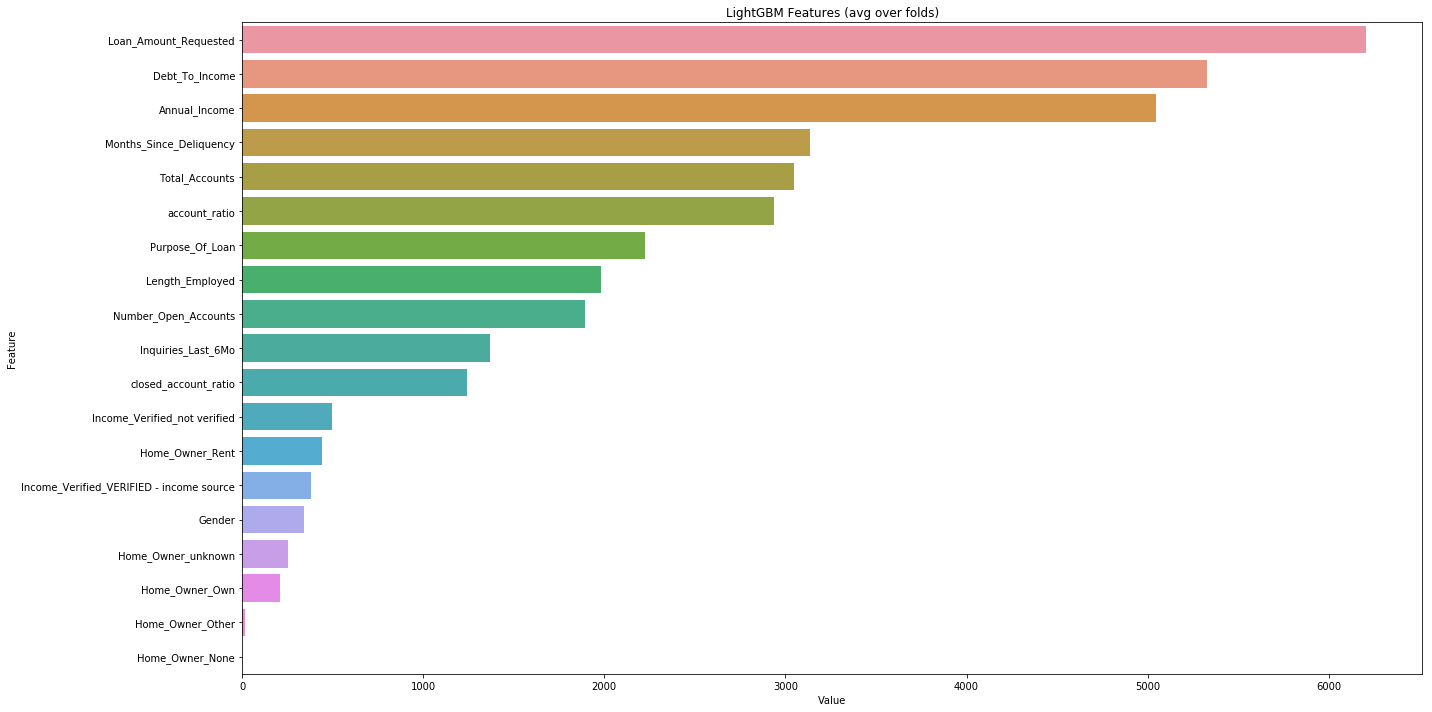

<Figure size 432x288 with 0 Axes>

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
Dataset_plot = Dataset_try2.drop(['Loan_ID','Interest_Rate'],axis = 1)
# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(lg_2.feature_importances_,Dataset_plot.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

In [38]:
Dataset_test.shape

(109541, 21)

# Submission code

In [39]:
X_main_test=Dataset_test.drop(['Interest_Rate', 'Loan_ID'], axis=1)

X_main_test=X_main_test.iloc[:, :].values

X_main_test[:, 2:3]=imputer.fit_transform(X_main_test[:, 2:3])

X_main_test[:, 6:7]=imputer.fit_transform(X_main_test[:, 6:7])

pd.DataFrame(X_test).isnull().sum()

Y_test_predict=lg_2.predict(X_main_test)

sample_submission=pd.read_csv('2. Final_Data/3.FINAL/sample_submission_HSqiq1Q.csv')
sample_submission['Interest_Rate']=Y_test_predict

sample_submission.to_csv('2. Final_Data/3.FINAL/submission_def_best_model_sumbission.csv', index=False)